## Hypothesis
To predict the incentive level requested for lowering thermostat settings for 2-3F 
    when being at home in winter.

### Filter: HomeWYN=1 (i.e., only use people who use A/C when being at home in summer)


In [24]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeWYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3   4   5   6   7   8 
118  68 145 163  85  60  87  98 

In [25]:
data1[data1$Latitude<0,]

,HomeW,HomeS,AwayW,AwayS,IncHomeS,IncHomeW,RewardForm,IncAwayS,IncAwayW,IncWD,...,BillS,BillW,Sqft,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,Latitude
276,70,NA,63,NA,NA,7,4,99,3,7,...,16,20,1500,3,2,3,1,1,4,-35
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


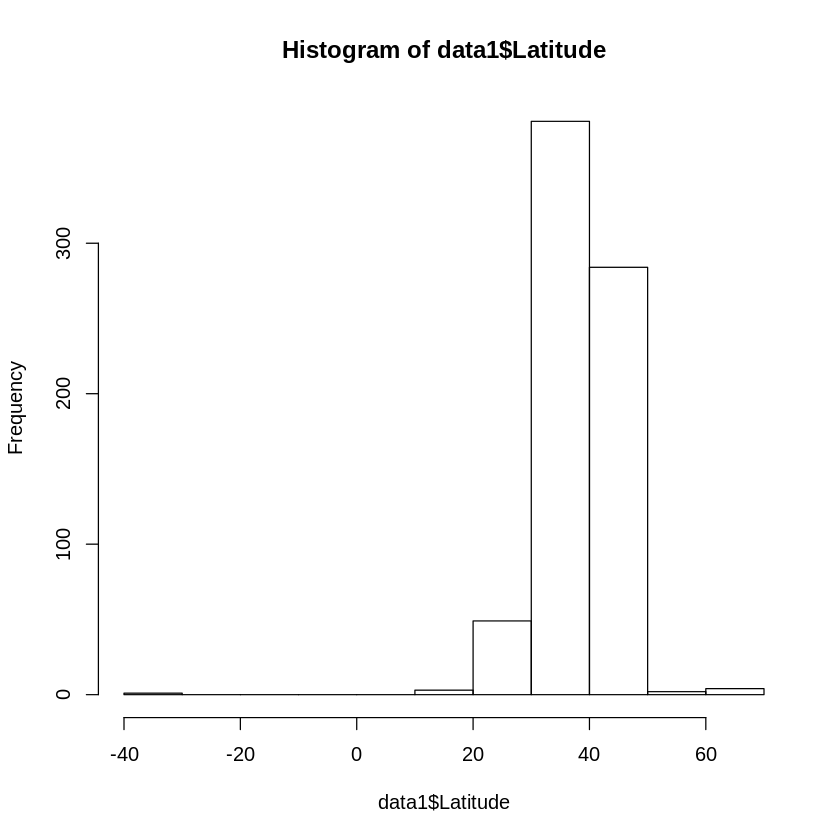

In [26]:
hist(data1$Latitude)

In [27]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)
table(data1$Political)

[1] 747   3



  1   2   3   4   5   6   7   8 
109  64 126 152  76  58  81  79 

In [28]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 747   3


In [29]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 747   3


In [30]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 747   4


In [31]:
#ComfNW-Mean(ComfNW1,ComfNW2)
tmp <- cbind(ComfNW1=data1$ComfNW1,ComfNW2=data1$ComfNW2)
print(dim(tmp))
data1$ComfNW <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNW1","ComfNW2"))]
#print(data1)

[1] 747   2


In [32]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 747   4


In [33]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 747   3


In [34]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 747   4


In [35]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 747   3


In [36]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 747   4


In [37]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 747   2


In [38]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeS" "113"  
[1] "AwayW" "72"   
[1] "AwayS" "202"  
[1] "IncHomeS" "53"      
[1] "IncWD" "71"   
[1] "IncDish" "226"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "23"      


[1] 747  62
[1] 599  62


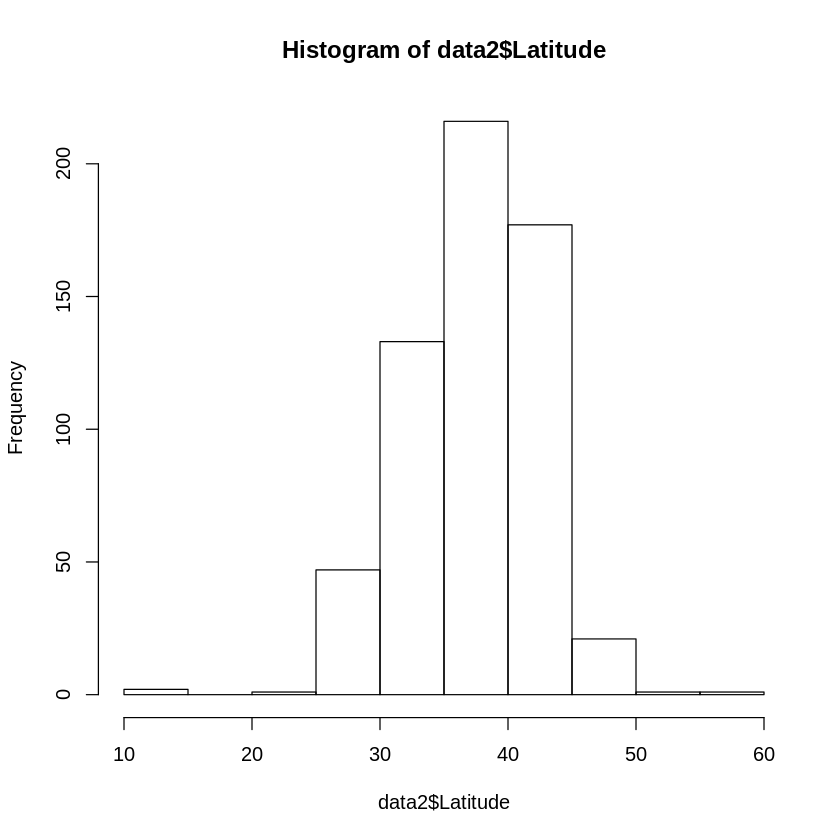

In [41]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
hist(data2$Latitude)
#data2[data2$Latitude<0,]
print(dim(data2))
#table(data2$Political)

In [42]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
table(data2$Political)
data2$Political[data2$Political==1]=3 #democrat
data2$Political[data2$Political==2]=3 #democrat
data2$Political[data2$Political==3]=3 #democrat
data2$Political[data2$Political==4]=2 #apolitical
data2$Political[data2$Political==8]=2 #apolitical
data2$Political[data2$Political==5]=1 #republican
data2$Political[data2$Political==6]=1 #republican
data2$Political[data2$Political==7]=1 #republican
table(data2$Political)


  1   2   3   4   5   6   7   8 
 85  52 103 122  61  50  64  62 


  1   2   3 
175 184 240 

In [43]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
table(data2$Ethnic)
data2$Ethnic[data2$Ethnic==1]=1 #white
data2$Ethnic[data2$Ethnic==2]=0 #non-white
data2$Ethnic[data2$Ethnic==3]=0
data2$Ethnic[data2$Ethnic==4]=0
data2$Ethnic[data2$Ethnic==5]=0
data2$Ethnic[data2$Ethnic==6]=0
data2$Ethnic[data2$Ethnic==7]=0
table(data2$Ethnic)


  1   2   3   4   5   6   7 
496  30  26   3  29  13   2 


  0   1 
103 496 

In [45]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
#"Frugal",
"MC",
"EnergyC",
#"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
#"SN",
"HabitG",
"HabitC",
"Latitude")

In [46]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS1"   
 [6] "ComfNS2"    "ComfNS3"    "ComfNW"     "ControlN1"  "ControlN2R"
[11] "ControlN3"  "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"    
[16] "ConvB4"     "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"  
[21] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitC3"   
[26] "HabitE1"    "HabitE2"    "HabitE3"    "HabitG"     "HomeS"     
[31] "HouseholdS" "INT1"       "INT2"       "INT3"       "INT4"      
[36] "IncAutoS"   "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S"
[41] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
[46] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
[51] "OwnRent"    "PBC"        "PBC3R"      "Political"  "RewardForm"
[56] "SN"         "SN3"        "Sqft"       "SqftCate"   "State"     
[61] "SubNorm"    "Trust"

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "Income"     "Latitude"   "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SqftCate"   "SubNorm"

In [47]:
data1 <- data2[, which(names(data2) %in% c("IncHomeW",IVS))];

In [48]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [49]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeW"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "EnergyC"    "ComfNW"     "Atti"      
[16] "SubNorm"    "PBC"        "HabitG"     "HabitC"

In [50]:
data1 [is.na(data1$IncHomeW), ]

IncHomeW,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,Latitude,MC,EnergyC,ComfNW,Atti,SubNorm,PBC,HabitG,HabitC


In [51]:
summary(data1$IncHomeW)
table(data1$IncHomeW)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       4       4       6      99 


  1   2   3   4   5   6   7   8  99 
 49  43  83 196  77  64  54  32   1 


  1   2   3   4   5 
 62 209 141 108  79 

In [52]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeW"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "EnergyC"    "ComfNW"     "Atti"      
[16] "SubNorm"    "PBC"        "HabitG"     "HabitC"

In [53]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [54]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeW        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      4.27      11.17       0.50       0.52       1.12       1.21       0.83 
    Ethnic     Income       Educ   Latitude         MC    EnergyC     ComfNW 
      0.38       1.98       1.11       5.02       1.08       1.40       1.75 
      Atti    SubNorm        PBC     HabitG     HabitC 
      1.10       1.35       0.95       1.15       1.60

In [55]:
hiCor(data2,.7)

<0 x 0 matrix>

In [58]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:18];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
       MC EnergyC  Atti SubNorm   PBC HabitG HabitC
PC1 -0.35   -0.42 -0.45   -0.35 -0.26  -0.32  -0.27
[1] 0.26
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.36   -0.51    -0.51      -0.23  -0.44
[1] 0.34
    Gender HouseholdS Ethnic Educ ComfNW
PC3   0.36       0.51  -0.35 -0.4   0.47
[1] 0.41
    Political  Educ   MC EnergyC  PBC HabitG HabitC
PC4     -0.53 -0.29 0.24   -0.34 0.37   0.38   0.23
[1] 0.47
    IncHomeW Age HouseholdS Latitude
PC5     0.52 0.4      -0.37    -0.51
[1] 0.53
    IncHomeW   Age Gender Ethnic Income Educ Latitude HabitC
PC6    -0.33 -0.21  -0.26   -0.6   0.23 0.23    -0.37   0.31
[1] 0.58
     Age Gender Educ Latitude ComfNW HabitC
PC7 0.24   0.29 0.39     0.37   0.53    0.3
[1] 0.64
    IncHomeW  Age Gender Political    MC SubNorm
PC8    -0.57 0.35   0.49       0.2 -0.26   -0.27
[1] 0.68
    Income  Educ    MC ComfNW  PBC HabitG HabitC
PC9  -0.23 -0.29 -0.26  -0.36 -0.5   0.32   0.44
[1] 0.73
     Gender Political Ethnic Educ Latitude SubNorm

ERROR: Error in resAbs[, i]: subscript out of bounds


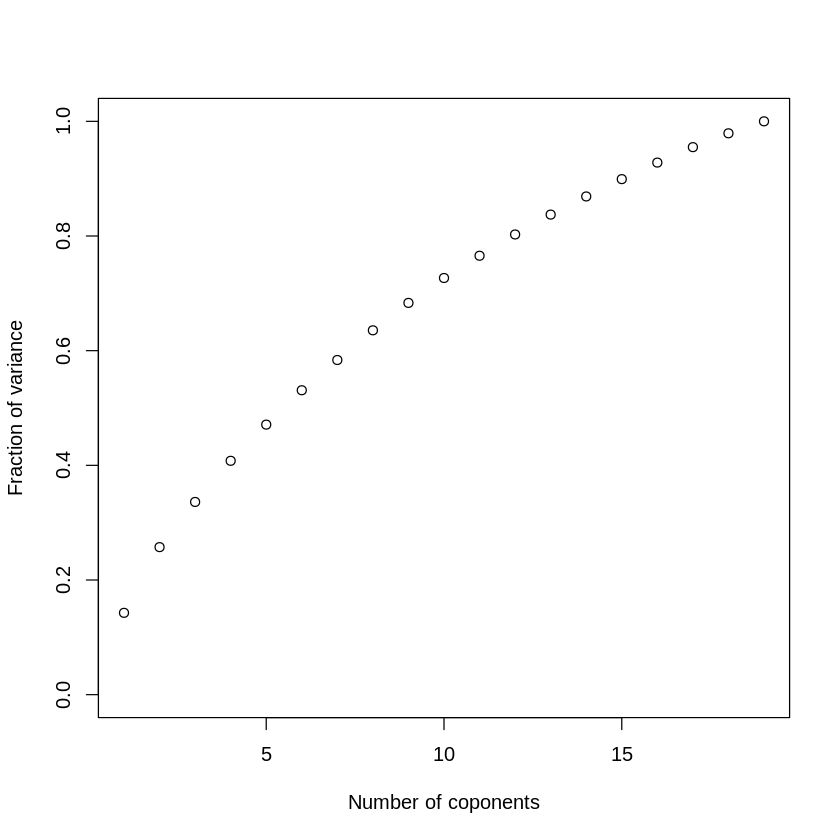

In [59]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [60]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [61]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,15,0.42
EnergyC,13,0.40
SqftCate,5,0.36
OwnRent,4,0.31
Income,9,0.26
HouseholdS,6,0.25
MC,12,0.24
SubNorm,16,0.21
HabitG,18,0.20
Age,2,0.19
Educ,10,0.18


In [62]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [63]:
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [64]:
table(data2[,"IncHomeW"])


  1   2   3   4   5   6   7   8  99 
 49  43  83 196  77  64  54  32   1 

In [65]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -6.53  -1.43  -0.22   1.07  90.10 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  6.96869    2.36802    2.94   0.0034 **
Atti        -0.03276    0.20480   -0.16   0.8730   
EnergyC      0.16709    0.15899    1.05   0.2937   
SqftCate     0.03433    0.19324    0.18   0.8591   
OwnRent      0.72472    0.40189    1.80   0.0719 . 
Income      -0.23224    0.10155   -2.29   0.0226 * 
HouseholdS  -0.13243    0.16477   -0.80   0.4219   
MC           0.31435    0.18370    1.71   0.0876 . 
SubNorm      0.00837    0.14407    0.06   0.9537   
HabitG      -0.16616    0.16853   -0.99   0.3246   
Age          0.02788    0.01717    1.62   0.1049   
Educ        -0.13186    0.17069   -0.77   0.4401   
HabitC      -0.23842    0.11862   -2.01   0.0449 * 
Gender      -0.40951    0.37152   -1.10   0.2708   
Political   -0.02173    0.22559   -0.10   0.9233   
PBC         -0.41095    0.196

In [66]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,5.8e-02,5.8e-02,3.3e-03,0.954
EnergyC,1,8.8e+00,8.8e+00,5.0e-01,0.481
SqftCate,1,3.1e+00,3.1e+00,1.7e-01,0.677
OwnRent,1,5.0e+01,5.0e+01,2.8e+00,0.095
Income,1,1.1e+02,1.1e+02,6.4e+00,0.011
HouseholdS,1,3.4e+00,3.4e+00,1.9e-01,0.660
MC,1,1.2e+01,1.2e+01,6.7e-01,0.414
SubNorm,1,8.6e+00,8.6e+00,4.8e-01,0.489
HabitG,1,3.7e+01,3.7e+01,2.1e+00,0.150
Age,1,3.6e+01,3.6e+01,2.0e+00,0.157


In [87]:
IndepPred = c('Atti', 'Educ', 'OwnRent', "Ethnic", 'Political', 'Latitude', 'SqftCate', 'HouseholdS', 'SubNorm', 'HabitC', 'PBC', 'Gender', 'ComfNW')
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-4.048 -1.213 -0.133  1.086  4.401 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.215977   1.844608    2.29    0.023 *
Atti        -0.159382   0.103734   -1.54    0.125  
Educ         0.000853   0.090004    0.01    0.992  
OwnRent      0.470640   0.220149    2.14    0.033 *
Ethnic       0.282727   0.296036    0.96    0.340  
Political    0.031133   0.122010    0.26    0.799  
Latitude    -0.014040   0.037134   -0.38    0.706  
SqftCate     0.070429   0.102637    0.69    0.493  
HouseholdS  -0.128531   0.095450   -1.35    0.179  
SubNorm      0.108599   0.076196    1.43    0.155  
HabitC      -0.158389   0.064504   -2.46    0.015 *
PBC          0.010361   0.106064    0.10    0.922  
Gender       0.324253   0.200724    1.62    0.107  
ComfNW       0.138708   0.057225    2.42    0.016 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

In [166]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,5.8e-02,0.058,0.0033,0.954
EnergyC,1,8.8e+00,8.844,0.4950,0.482
SqftCate,1,3.1e+00,3.103,0.1737,0.677
OwnRent,1,5.0e+01,49.676,2.7805,0.096
MC,1,1.5e+01,15.017,0.8406,0.360
HouseholdS,1,5.5e+00,5.471,0.3062,0.580
Income,1,1.1e+02,109.581,6.1335,0.014
SubNorm,1,8.6e+00,8.557,0.4790,0.489
HabitG,1,3.7e+01,37.003,2.0711,0.151
HabitC,1,1.1e+02,106.907,5.9838,0.015


In [167]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeW        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.00       0.86       0.93       0.56       0.47       0.89       0.93 
    Ethnic     Income       Educ   Latitude     Frugal         MC    EnergyC 
      0.99       0.73       0.97       1.00       0.57       0.74       0.54 
     Trust     ComfNW       Atti    SubNorm        PBC         SN     HabitG 
      0.95       0.99       0.44       0.77       0.90       0.88       0.86 
    HabitC 
      0.90 

Loadings:
           Factor1 Factor2
Frugal      0.65          
MC          0.51          
EnergyC     0.67          
Atti        0.75          
OwnRent             0.66  
SqftCate            0.73  
Income              0.52  
IncHomeW                  
Age                 0.37  
Gender                    
HouseholdS          0.33  
Political                 
Ethnic                    
Educ                      
Latitude       

In [174]:
mod = lm(IncHomeW~Frugal,data=data2)
summary(mod)


Call:
lm(formula = IncHomeW ~ Frugal, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.33  -1.45  -0.30   1.00  93.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.106      1.135    6.26  7.2e-10 ***
Frugal        -0.443      0.188   -2.36    0.018 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.3 on 597 degrees of freedom
Multiple R-squared:  0.00926,	Adjusted R-squared:  0.00761 
F-statistic: 5.58 on 1 and 597 DF,  p-value: 0.0185


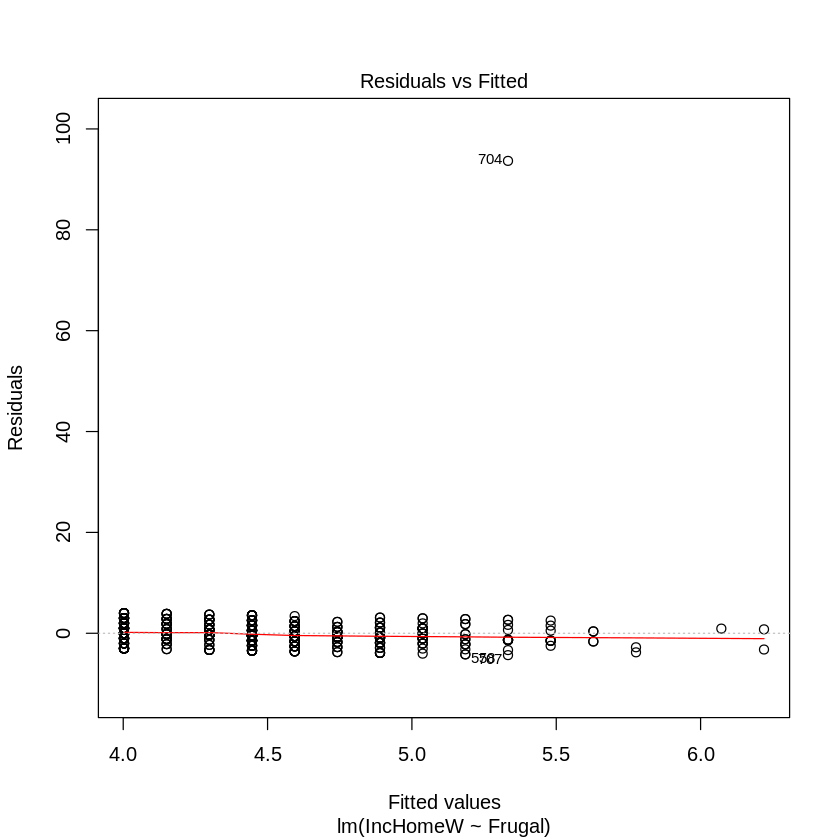

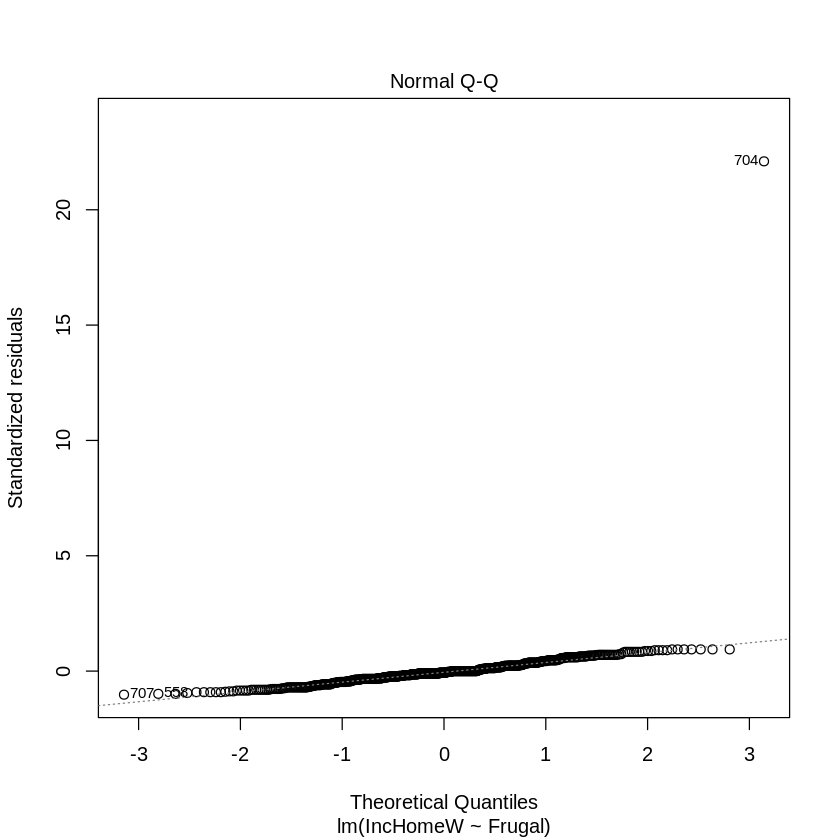

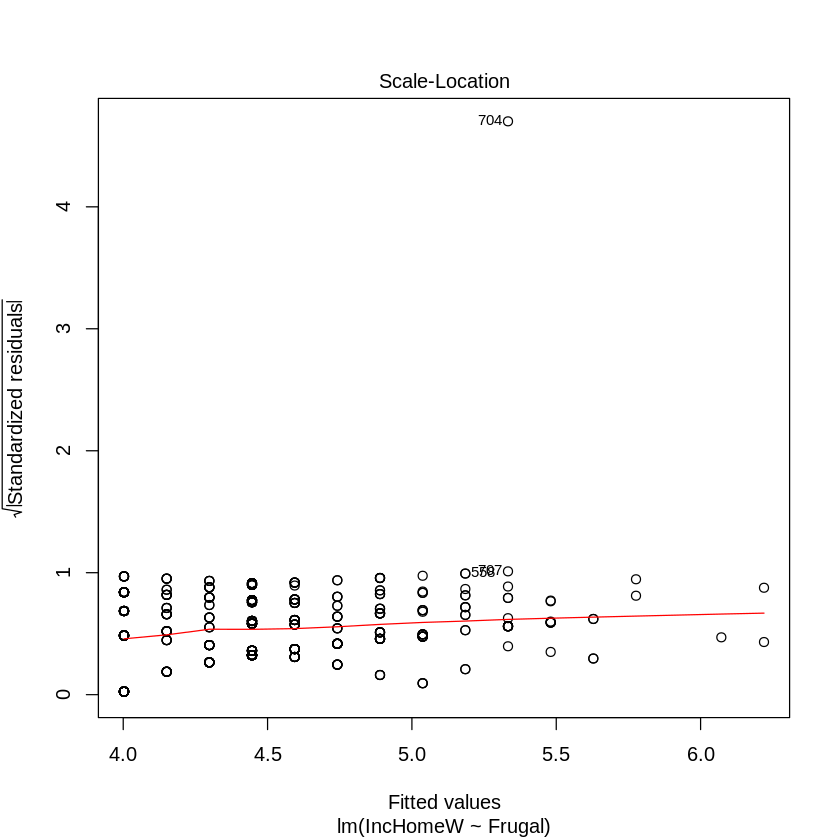

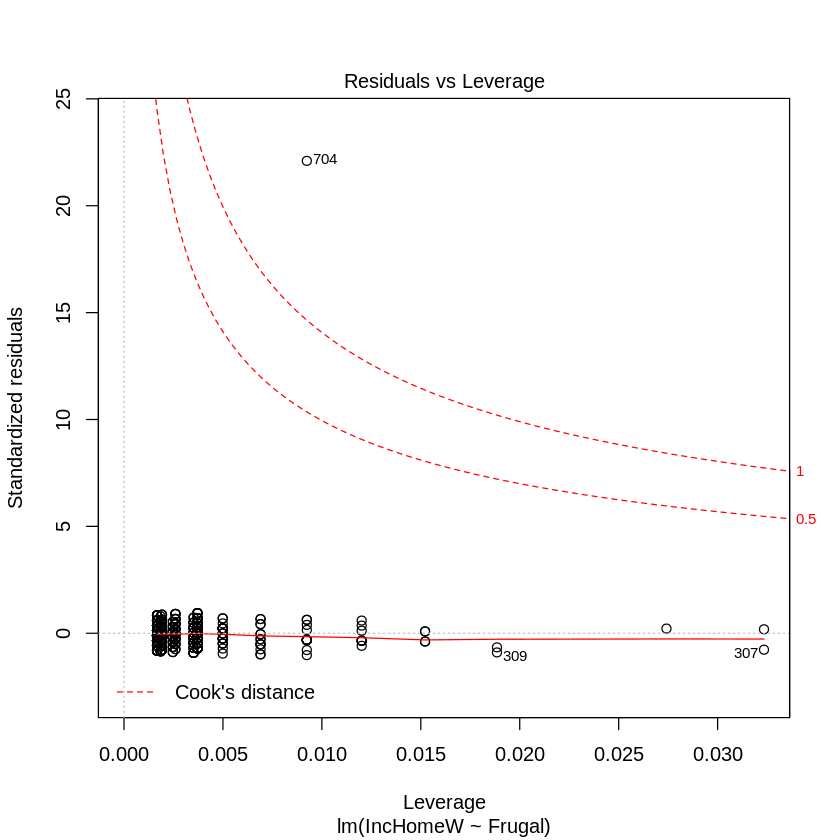

In [175]:
plot(mod)

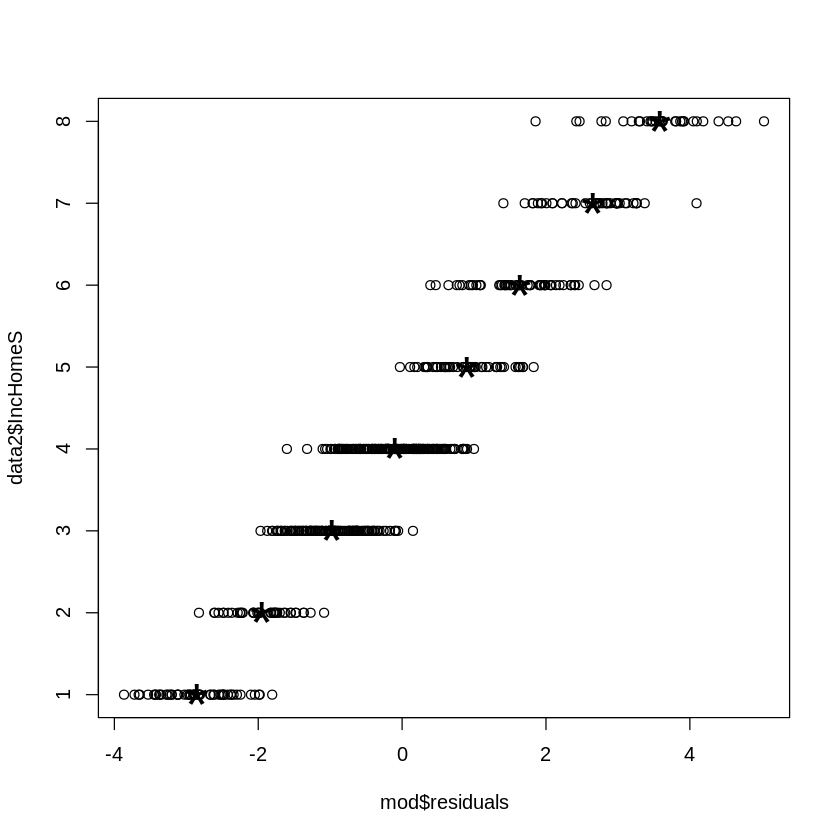

In [45]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [179]:
mod = lm(IncHomeW~Frugal+Trust+MC+ComfNW+Income+HabitC+OwnRent+EnergyC+PBC+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeW ~ Frugal + Trust + MC + ComfNW + Income + 
    HabitC + OwnRent + EnergyC + PBC + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.75  -1.48  -0.24   1.23  88.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0511     1.6851    4.18  3.3e-05 ***
Frugal       -0.6505     0.2241   -2.90   0.0038 ** 
Trust        -0.3155     0.1242   -2.54   0.0114 *  
MC            0.4392     0.1799    2.44   0.0149 *  
ComfNW        0.2117     0.0985    2.15   0.0320 *  
Income       -0.2282     0.0922   -2.48   0.0136 *  
HabitC       -0.2280     0.1103   -2.07   0.0391 *  
OwnRent       0.7073     0.3707    1.91   0.0569 .  
EnergyC       0.2848     0.1390    2.05   0.0410 *  
PBC          -0.3020     0.1908   -1.58   0.1140    
Age           0.0259     0.0162    1.60   0.1106    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.2 on 588 degrees of freedom
Multiple R-s

In [173]:
#Probably overfitting
mod1 = lm(IncHomeW~Frugal+Trust+MC+ComfNW+Income,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeW ~ Frugal + Trust + MC + ComfNW + Income, 
    data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.00  -1.41  -0.21   1.08  90.94 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.1053     1.4568    4.88  1.4e-06 ***
Frugal       -0.5783     0.2050   -2.82   0.0050 ** 
Trust        -0.3233     0.1245   -2.60   0.0097 ** 
MC            0.4083     0.1765    2.31   0.0210 *  
ComfNW        0.1955     0.0991    1.97   0.0489 *  
Income       -0.1423     0.0872   -1.63   0.1033    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.2 on 593 degrees of freedom
Multiple R-squared:  0.0403,	Adjusted R-squared:  0.0322 
F-statistic: 4.98 on 5 and 593 DF,  p-value: 0.000179


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

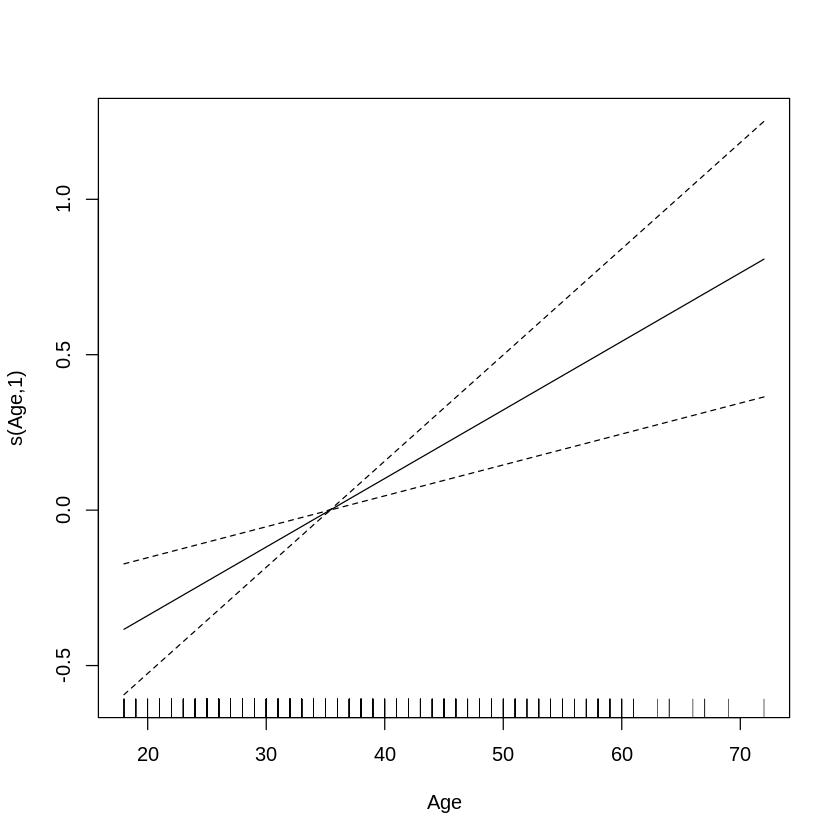

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



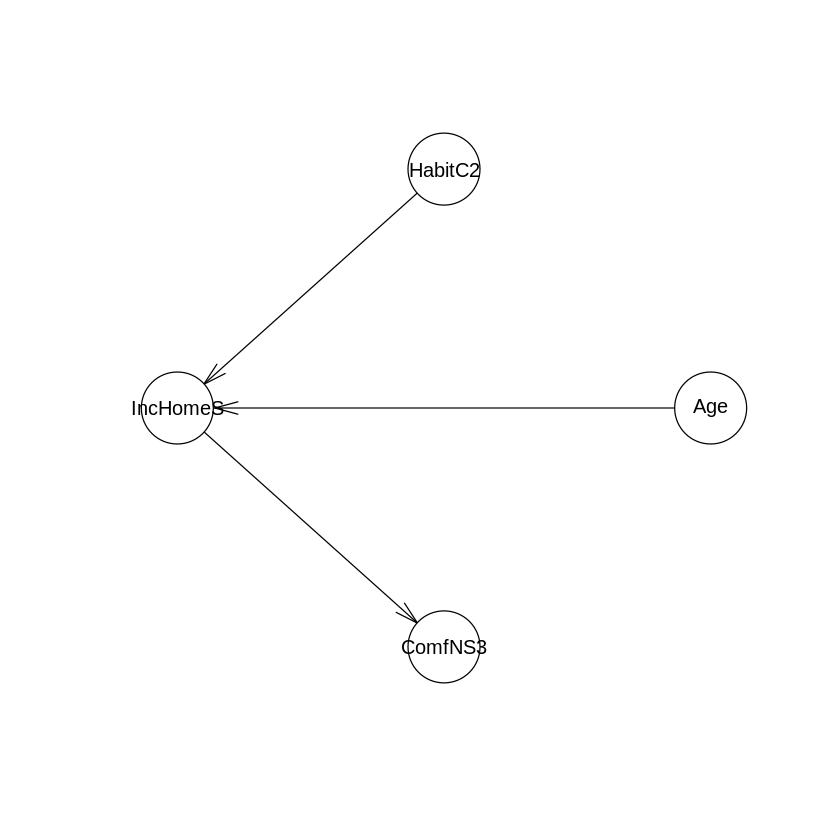

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

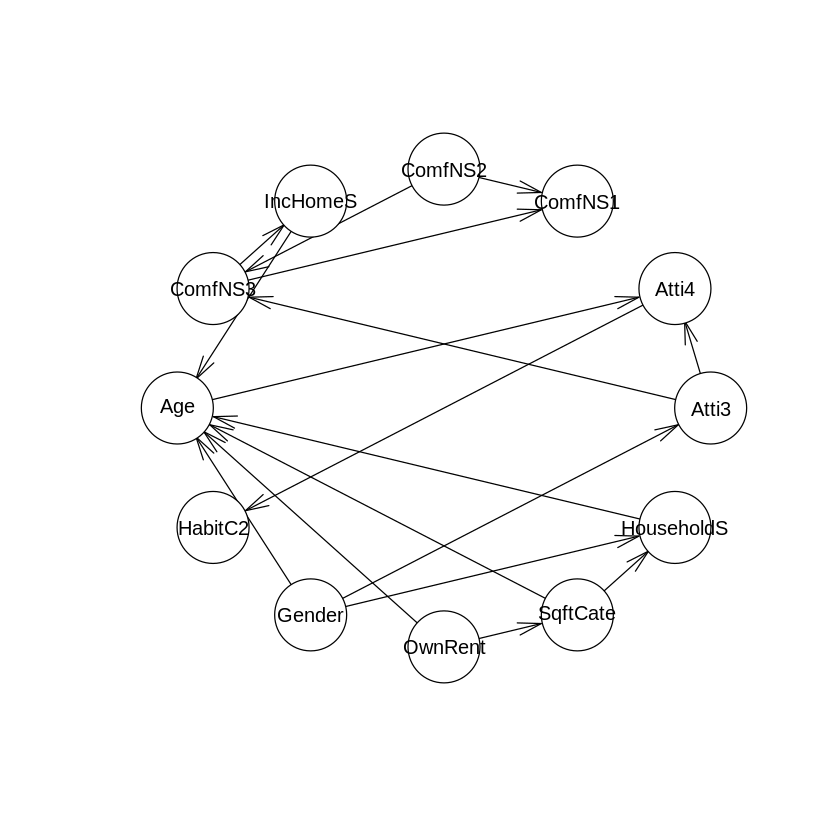

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)